# Assignement 1 - Filippo Conforto

In [2]:
library(tidyverse)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1

Starting from the information present in Wikipedia, main properties are stored by using a serie of vectors

In [3]:
l_name = c("Loch Ness", "Loch Lomond", "Loch Morar", "Loch Tay","Loch Awe",
           "Loch Maree","Loch Ericht", "Loch Lochy","Loch Rannoch","Loch Shiel",
           "Loch Katrine","Loch Arkaig" ,"Loch Shin")
vol = c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)

area = c(56.0,71.0,27.0,26.4,39.0,28.6,18.6,16.0,19.0,19.5,12.4,16.0,22.5)
len = c(39.0,36.0,18.8,23.0,41.0,20.0,23.0,16.0,15.7,28.0,12.9,19.3,27.8)
max_d = c(230,190,310,150,94,114,156,162,134,128,151,109,49)
mean_d = c( 132.0,37.0,87.0,60.6,32.0,38.0,57.6,70.0,51.0,40.0,43.4,46.5,15.5)

Using these vector a dataframe can be created with `data.frame()` function 

In [4]:
lakes = data.frame(Loch = l_name, Volume = vol, Area = area, Length = len, Max_Depth = max_d, Mean_Depth = mean_d)

Lake with highest or lowest value of area, volume can be found using `order()` function

In [5]:
message("The lake with highest volume is: ",lakes[order(lakes$Volume, decreasing = TRUE),][1,]$Loch)
message("The lake with lowest volume is: ",lakes[order(lakes$Volume),][1,]$Loch)
message("The lake with highest area is: ",lakes[order(lakes$Area),][1,]$Loch)
message("The lake with lowest area is: ",lakes[order(lakes$Area, decreasing = TRUE),][1,]$Loch)

The lake with highest volume is: Loch Ness

The lake with lowest volume is: Loch Shin

The lake with highest area is: Loch Katrine

The lake with lowest area is: Loch Lomond



With the same function, `order()`, a dataframe can be produced

In [8]:
lakes[order(lakes$Area, decreasing = TRUE),]

,Loch,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71.0,36.0,190,37.0
1,Loch Ness,7.45,56.0,39.0,230,132.0
5,Loch Awe,1.20,39.0,41.0,94,32.0
6,Loch Maree,1.09,28.6,20.0,114,38.0
3,Loch Morar,2.30,27.0,18.8,310,87.0
4,Loch Tay,1.60,26.4,23.0,150,60.6
13,Loch Shin,0.35,22.5,27.8,49,15.5
10,Loch Shiel,0.79,19.5,28.0,128,40.0
9,Loch Rannoch,0.97,19.0,15.7,134,51.0


In [48]:
message("The two largest area lakes are ",lakes[order(lakes$Area, decreasing = TRUE),][1,]$Loch, " And ",lakes[order(lakes$Area, decreasing = TRUE),][2,]$Loch)

The two largest area lakes are Loch Lomond And Loch Ness



In [52]:
message("The sum of lakes' area is ",sum(lakes$Area)," km^2")

The sum of lakes' area is 372 km^2



## Exercise 2


Data can be imported from the original source

In [69]:
oildata = read.table("DATA/crude-oil-prices.csv", sep = ",", header = T)

Using `plot()` function, oil price variation trough the years can be shown

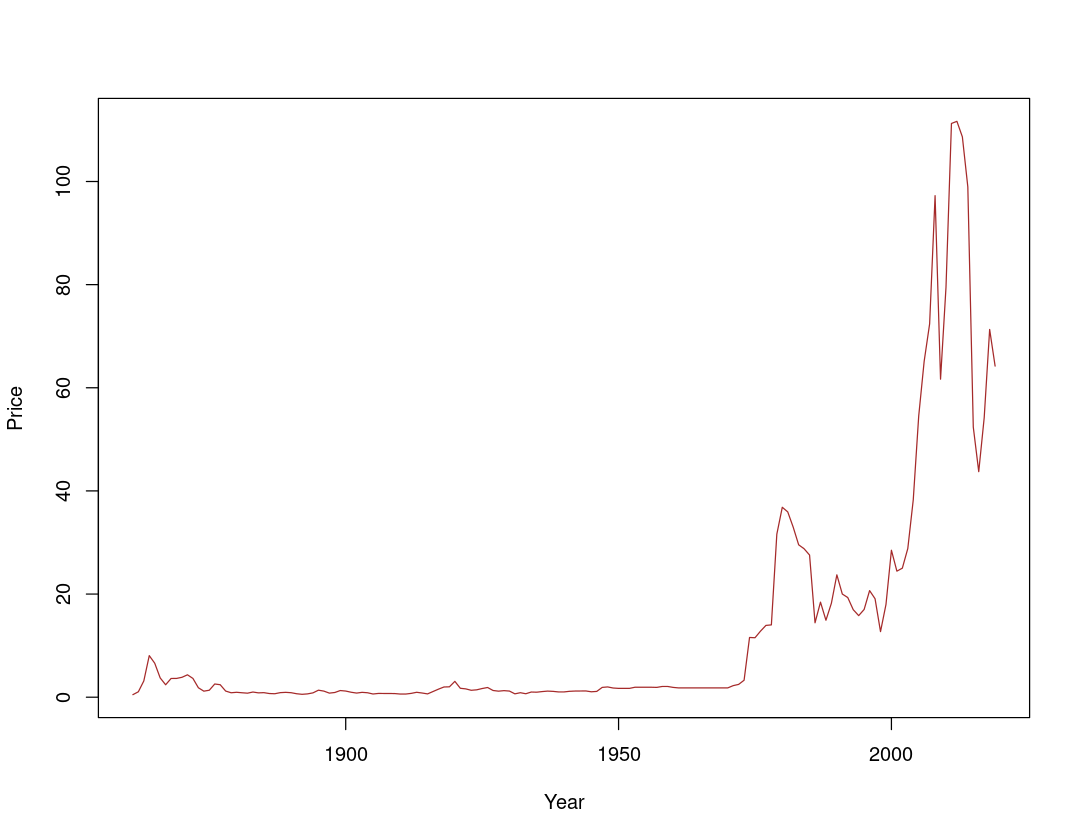

In [70]:
options(repr.plot.width=9, repr.plot.height=7)
plot(oildata$Year, oildata$Oil, t="l", xlab = "Year", ylab = "Price", col = "brown")

In [72]:
message("Highest oil price in history: ", format(oildata[order(oildata$OilPrice, decreasing = T),][1,]$OilPrice, digits = 5))
message("Highest oil price occurence: ",oildata[order(oildata$OilPrice, decreasing = T),][1,]$Year)

Highest oil price in history: 111.67

Highest oil price occurence: 2012



The discrete derivative of the oil price variation is obtained using appropriate slicing, and plotted using the `plot()` function

In [73]:
deriv = oildata[2:nrow(oildata),]$OilPrice - oildata[1:nrow(oildata)-1,]$OilPrice

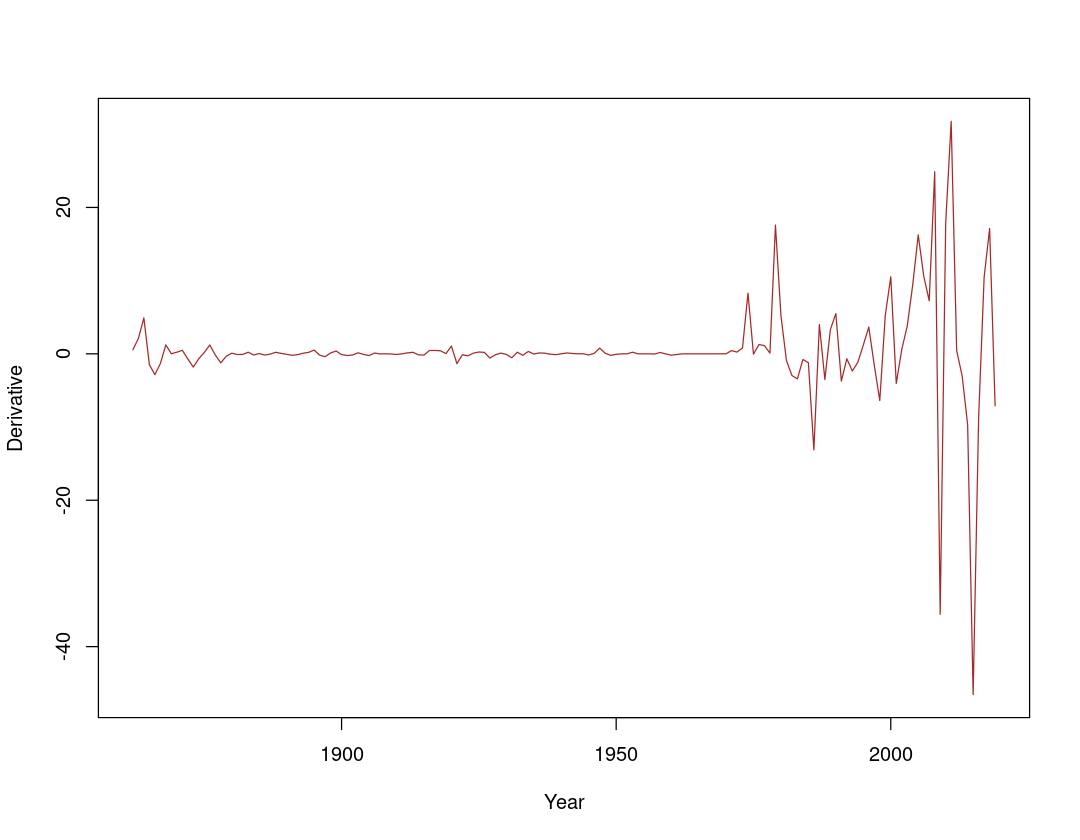

In [74]:
options(repr.plot.width=9, repr.plot.height=7)
plot(oildata$Year[-1], deriv, t="l", xlab = "Year", ylab = "Derivative", col = "brown")

## Exercise 3

In [51]:
coaldata = tibble(read_csv("DATA/coal-production-by-country.csv")) ## Download da internet



── Column specification ────────────────────────────────────────────────────────
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




From the starting dataframe entities not representing a state are removed using a for loop, in order to accurately represent data.

In [53]:
not_cnt = c("Europe","EU-28", "CIS", "Eurasia", "Europe (other)", 'Asia Pacific','Asia and Oceania', 'North America', 'Central and South America', 'OECD','OPEC','Other Africa','Other Asia & Pacific', 'Other CIS','Other S. & Cent. America', 'USSR', "World")
coaldata = subset(coaldata,!(Entity %in% not_cnt))
un_cnt = unique(coaldata$Entity)

This dataframe contains data from a number of countries that can be obtained using the function `length()` after getting the number of unique countries using `unique()`

In [54]:
message("The number of countries available in the file is ", length(un_cnt))

The number of countries available in the file is 183



The count of entries for each country is given by the function `table()`, that in this case associate each country with the number of times that it present in the list

In [14]:
counts = table(coaldata$Entity)

Finally the barplot is obtained using the counts object, that contains both the number of counts and the country associated

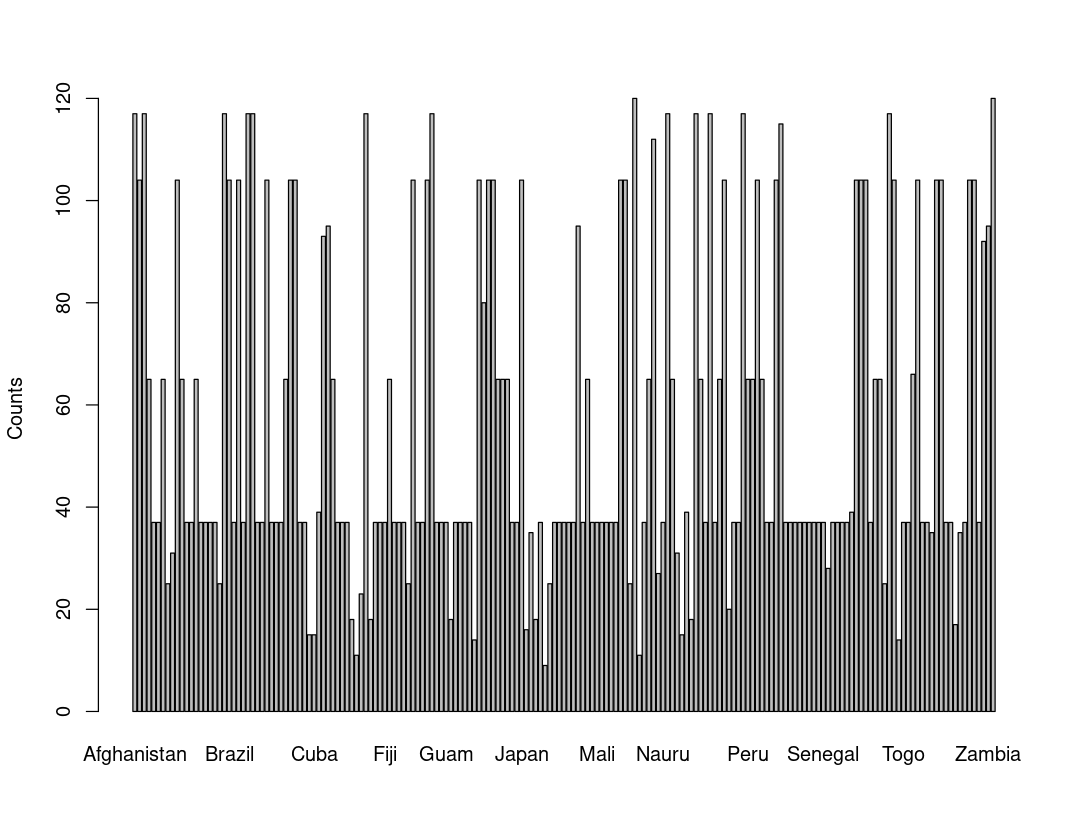

In [55]:
options(repr.plot.width=9, repr.plot.height=7)
barplot(counts, names.arg = dimnames(counts)[[1]], ylab = "Counts")

For the next steps is useful to save a subset of the original dataframe, containing only data for years following the 1970

In [56]:
coaldata70 = coaldata[coaldata$Year > 1970,]

To get the sum of coal production `aggregate()` function is used

In [57]:
agg_coal = aggregate(coaldata70[4], by= list(coaldata70$Entity), FUN = sum)

In [58]:
for (i in 1:5){
    message("The ", i, "° country for coal production is ", agg_coal[order(agg_coal$C, decreasing = TRUE),][i,]$Group.1, " and has a total production of: ", agg_coal[order(agg_coal$C, decreasing = TRUE),][i,]$Coal, " TWh")
}


The 1° country for coal production is China and has a total production of: 459564.647 TWh

The 2° country for coal production is United States and has a total production of: 226068.837 TWh

The 3° country for coal production is Russia and has a total production of: 98251.646 TWh

The 4° country for coal production is Australia and has a total production of: 83077.065 TWh

The 5° country for coal production is India and has a total production of: 77043.453 TWh



Is useful also to save this countries and their coal production in order to plot their history. This time ggplot is used, since it allows to group easily the countries data.

In [59]:
top_cnt = agg_coal[order(agg_coal$C, decreasing = TRUE),][1:5,]$Group.1

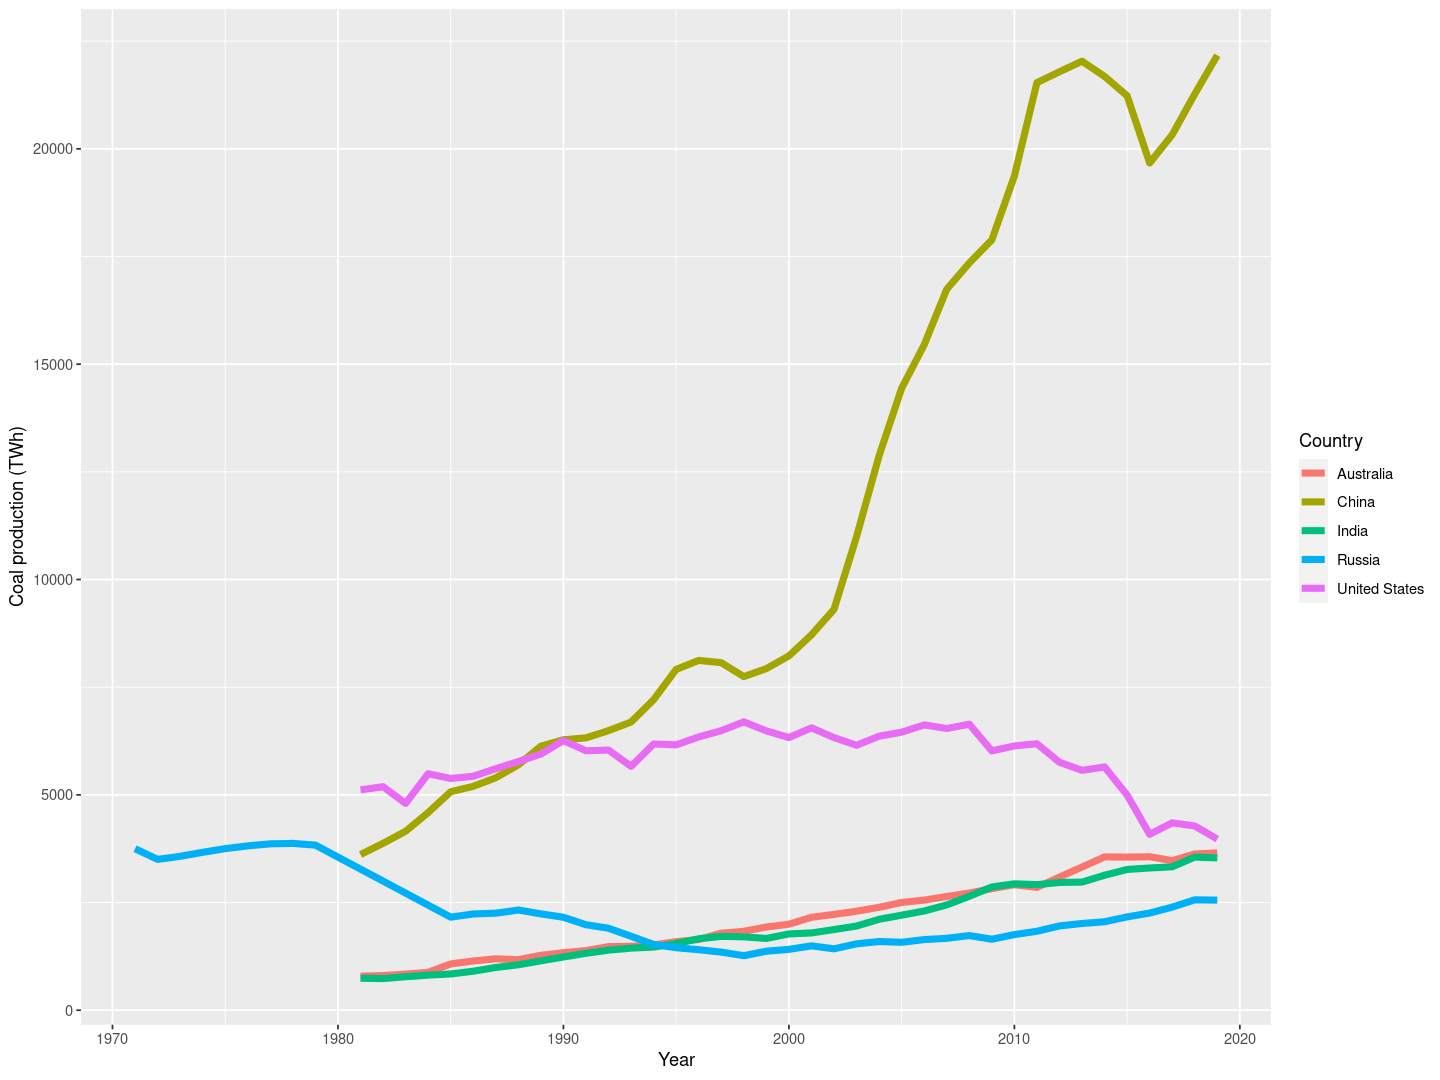

In [77]:
options(repr.plot.width=12, repr.plot.height=9)
ggplot ( subset(coaldata70,Entity %in% top_cnt)) + 
aes ( x = Year, y = `Coal production (TWh)`,colour = Entity) + 
geom_line(size = 2) +
labs(colour = "Country")

Using an aggregate and `ggplot()` the total coal production can be shown 

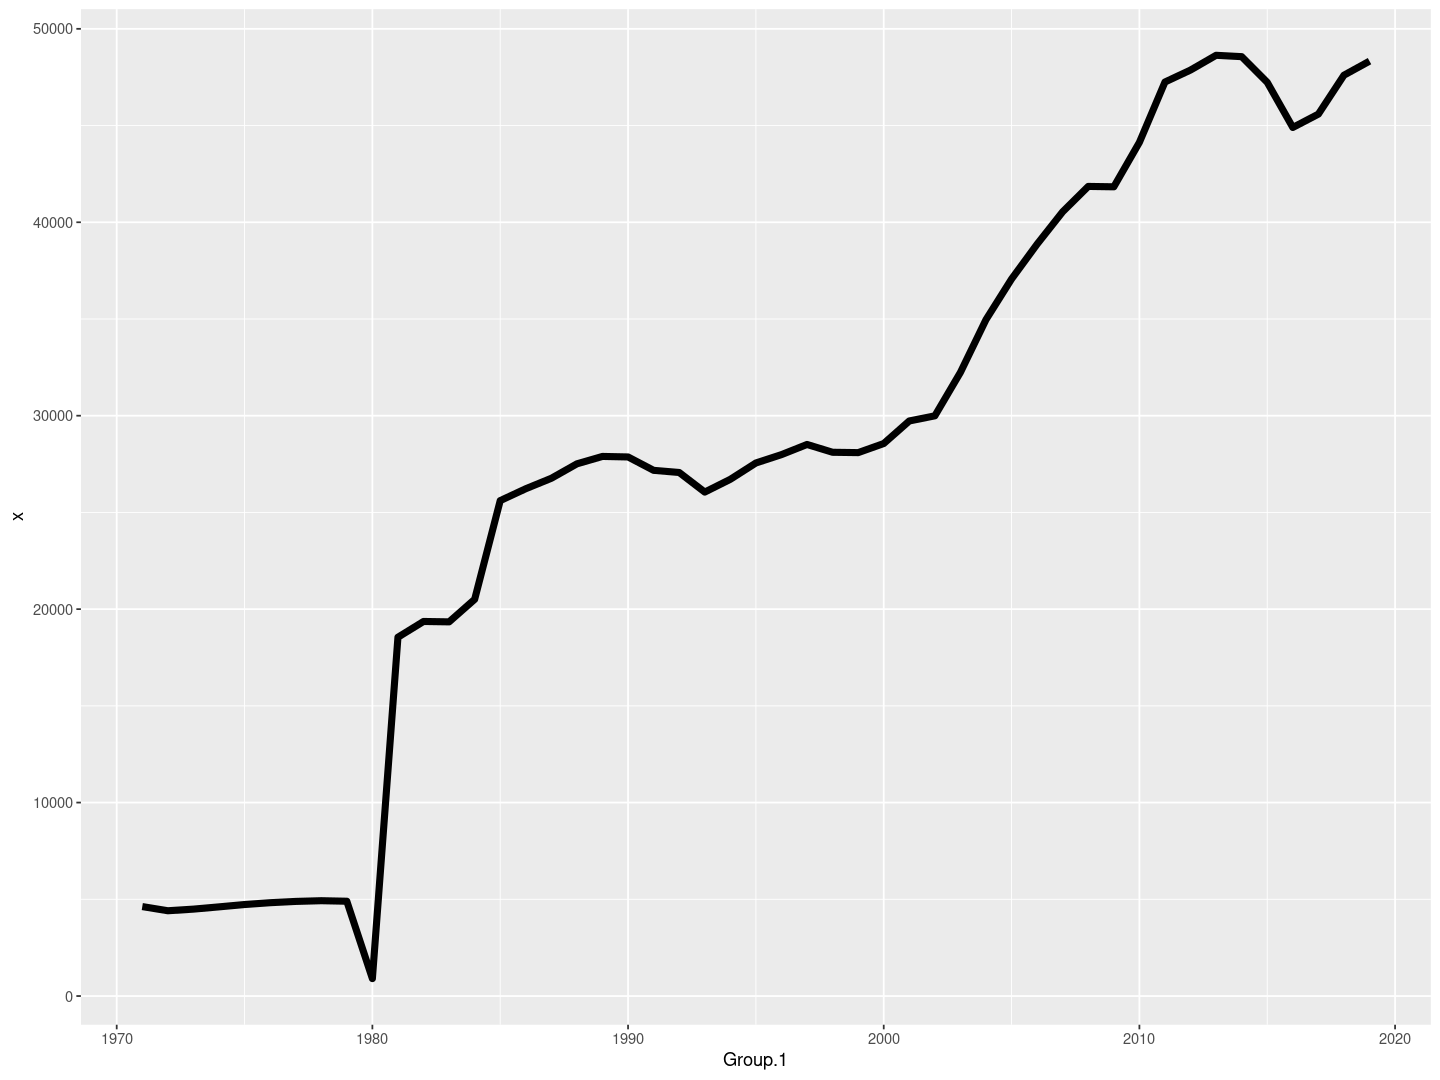

In [73]:
options(repr.plot.width=12, repr.plot.height=9)
ggplot ( aggregate(coaldata70$`Coal production (TWh)`, by= list(coaldata70$Year), FUN = sum)) + 
    aes ( x = Group.1, y = x) + 
    geom_line(size = 2)

## Exercise 4

In [33]:
data_covid = tibble(read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




### Italy

These cells are similar for all the countries discussed here and are used to save data regarding the selected country

In [34]:
data_ita = filter(data_covid, location == "Italy")

From this dataframe is possible, using ggplot, to get the desired graph

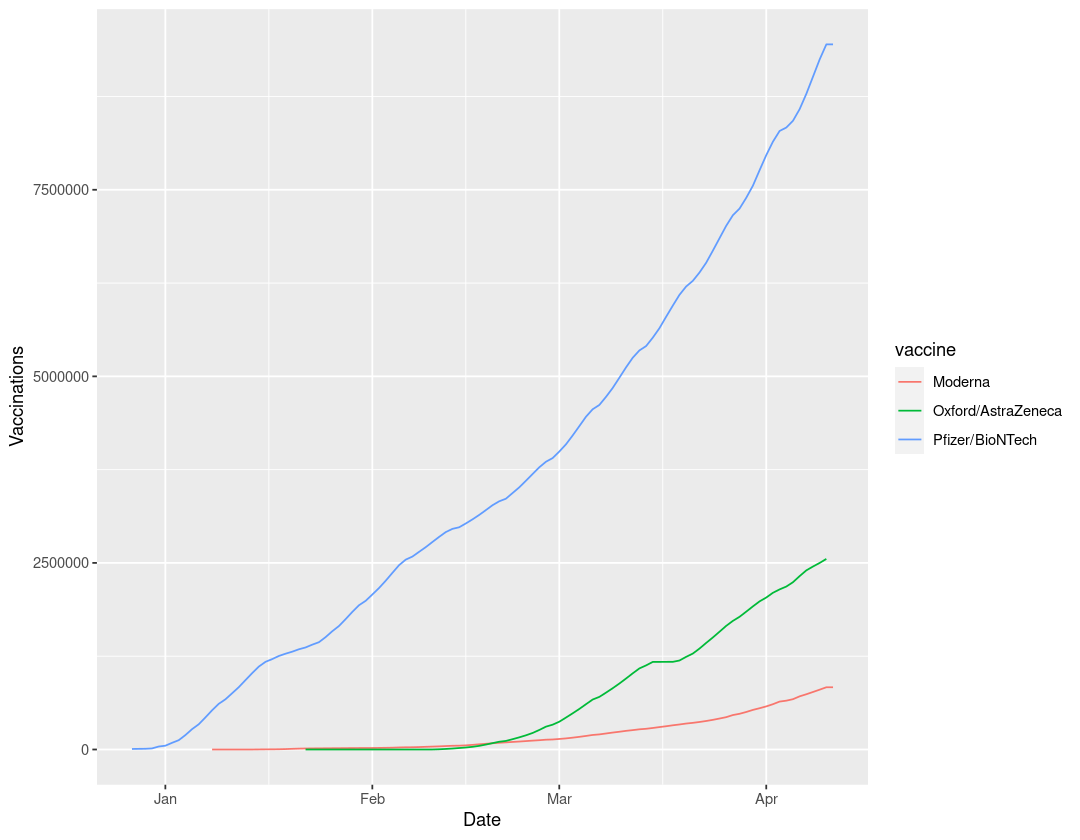

In [35]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_ita, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) + geom_line() + xlab("Date") + ylab("Vaccinations")

In order to get the total number of vaccinations an aggregate is required

In [36]:
data_agg = aggregate(data_ita$total_vaccinations, by= list(data_ita$date), FUN = sum)

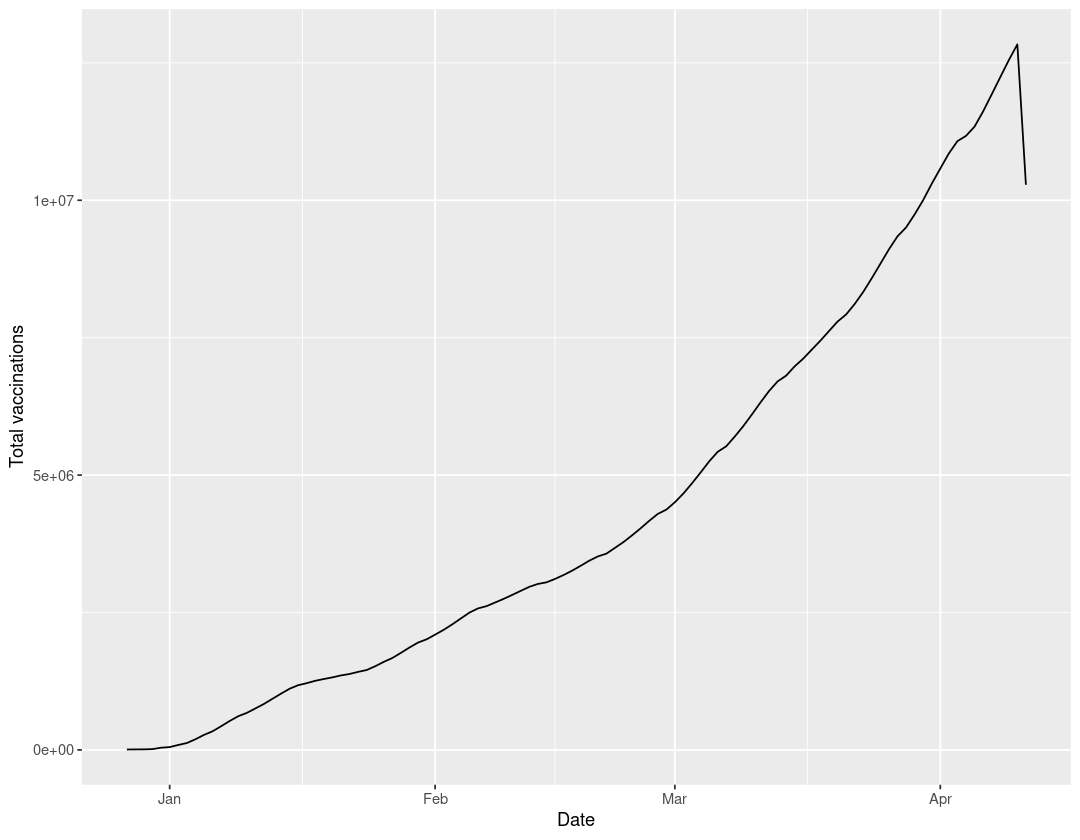

In [37]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg, aes ( x = Group.1, y = x), FUN = sum) + geom_line() +  xlab("Date") + ylab("Total vaccinations")


Using these techniques the analysis can be repeated over a number of different countries

### Germany

In [38]:
data_ger = filter(data_covid, location == "Germany")

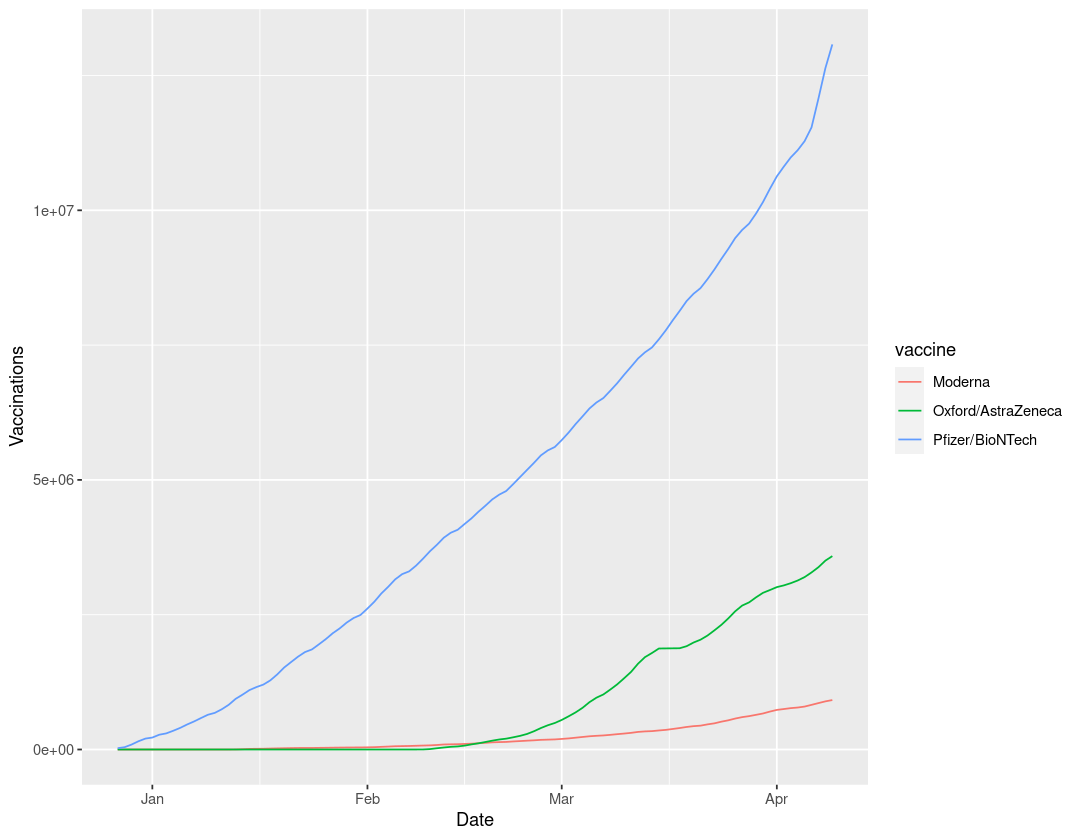

In [39]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_ger, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) + geom_line() + xlab("Date") + ylab("Vaccinations")

In [40]:
data_agg = aggregate(data_ger$total_vaccinations, by= list(data_ger$date), FUN = sum) 

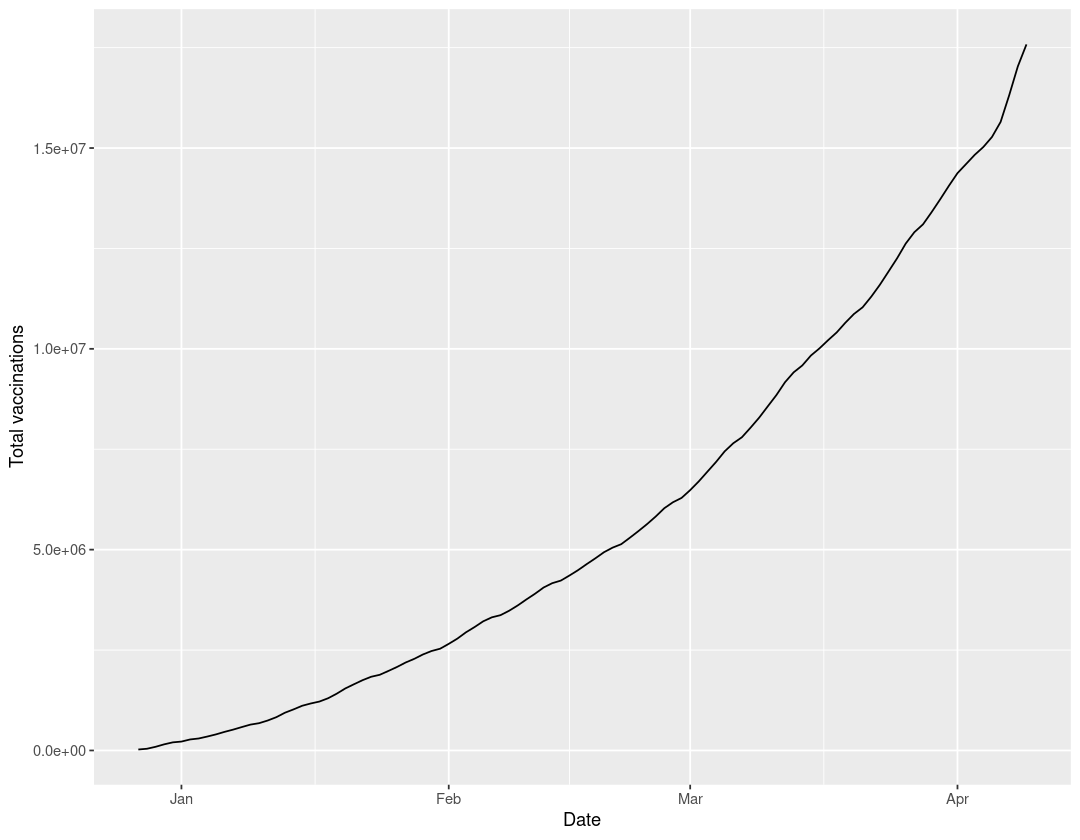

In [41]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg, aes ( x = Group.1, y = x), FUN = sum) + geom_line() + xlab("Date") + ylab("Total vaccinations")

### USA

In [19]:
data_usa = filter(data_covid, location == "United States")

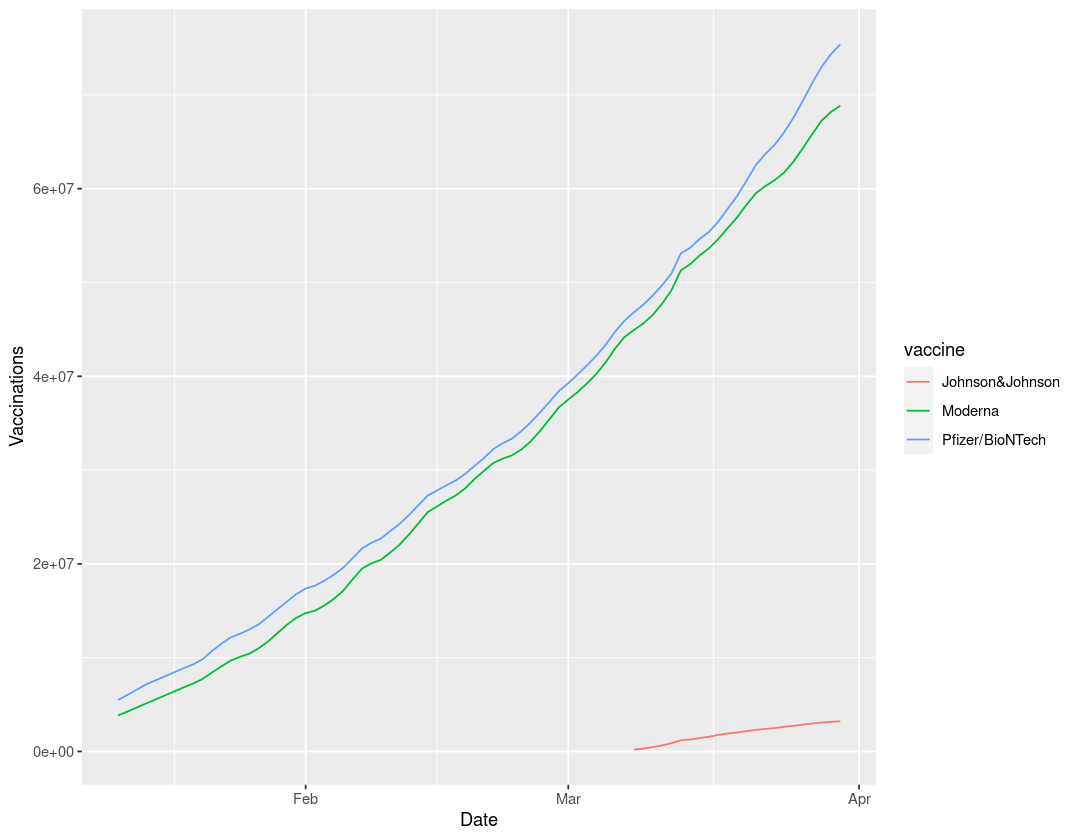

In [54]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_usa, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) + geom_line() + xlab("Date") + ylab("Vaccinations")


In [21]:
data_agg = aggregate(data_usa$total_vaccinations, by= list(data_usa$date), FUN = sum) 

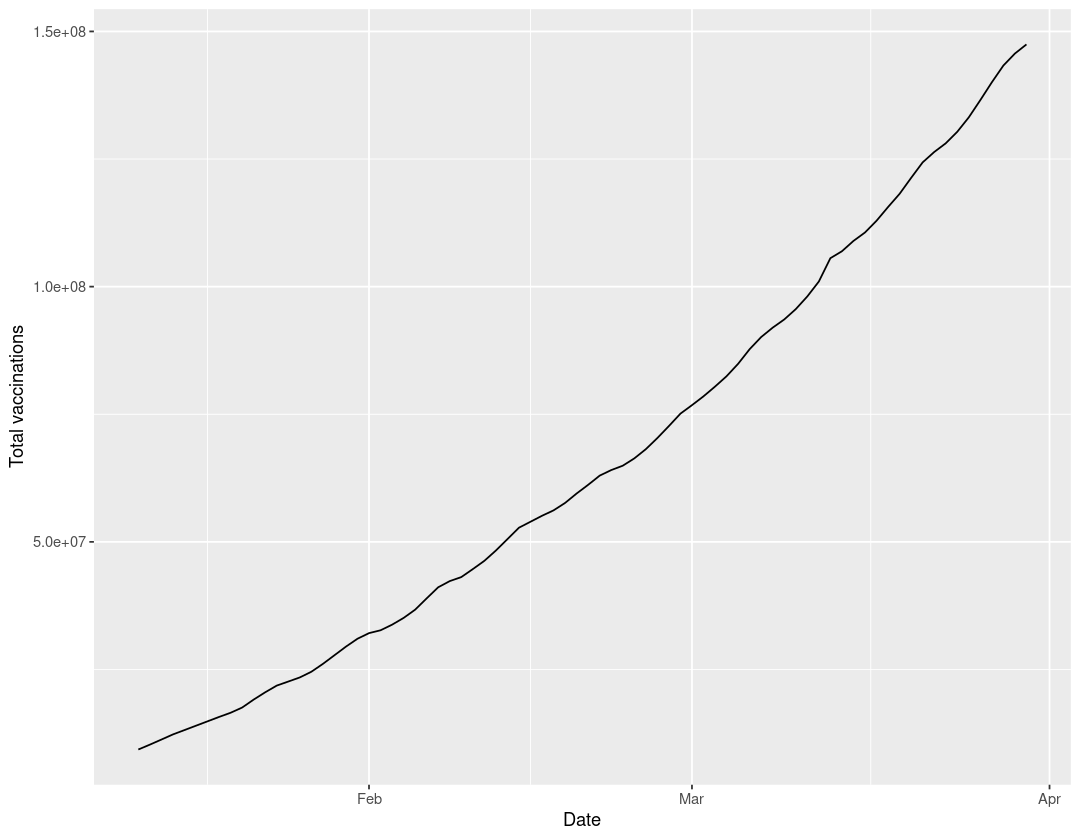

In [55]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg, aes ( x = Group.1, y = x), FUN = sum) + geom_line() + xlab("Date") + ylab("Total vaccinations")


### EU Countries 

In [23]:
covid_data2 = tibble(read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"))


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)




By selecting the list of european countries, the final plot can be produced using ggplot.

In [24]:
eu_countries = c("Austria", "Belgium", "Bulgaria", "Croatia", "Republic of Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy",
                 "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden")

Warning message:
“Removed 42 row(s) containing missing values (geom_path).”


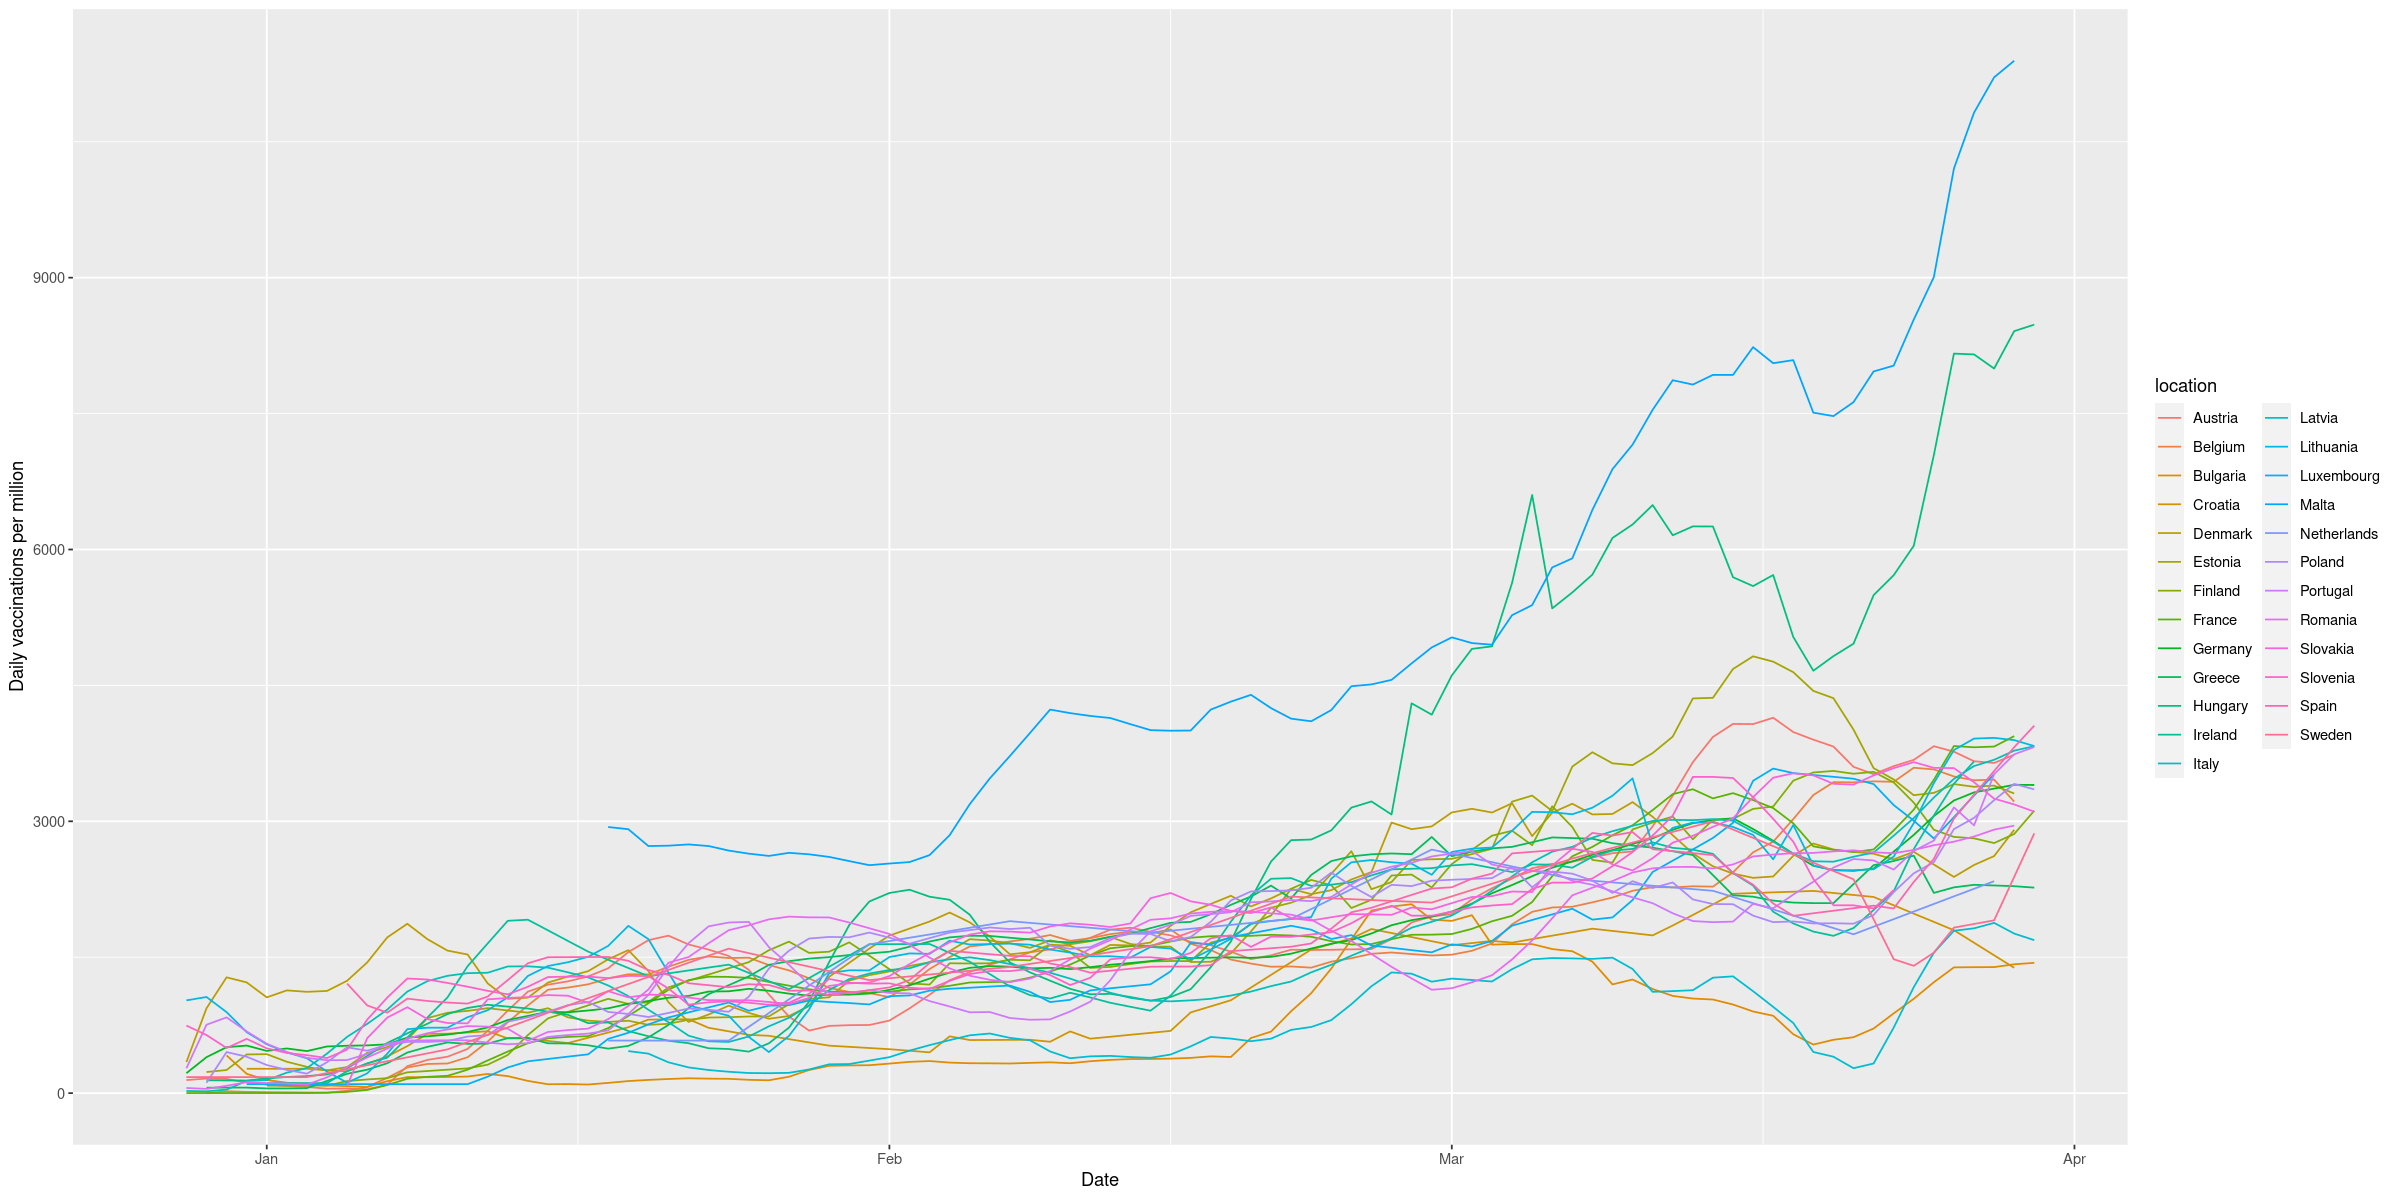

In [48]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot ( subset(covid_data2,location %in% eu_countries)) + aes ( x = date, y = daily_vaccinations_per_million, group = location, colour = location) + geom_line() + xlab("Date") + ylab("Daily vaccinations per million")

By plotting the number of people vaccinate and fully vaccinated in italy or othere countries, is possible to see if there is a strategy on how to vaccinate people

Warning message:
“Removed 21 row(s) containing missing values (geom_path).”


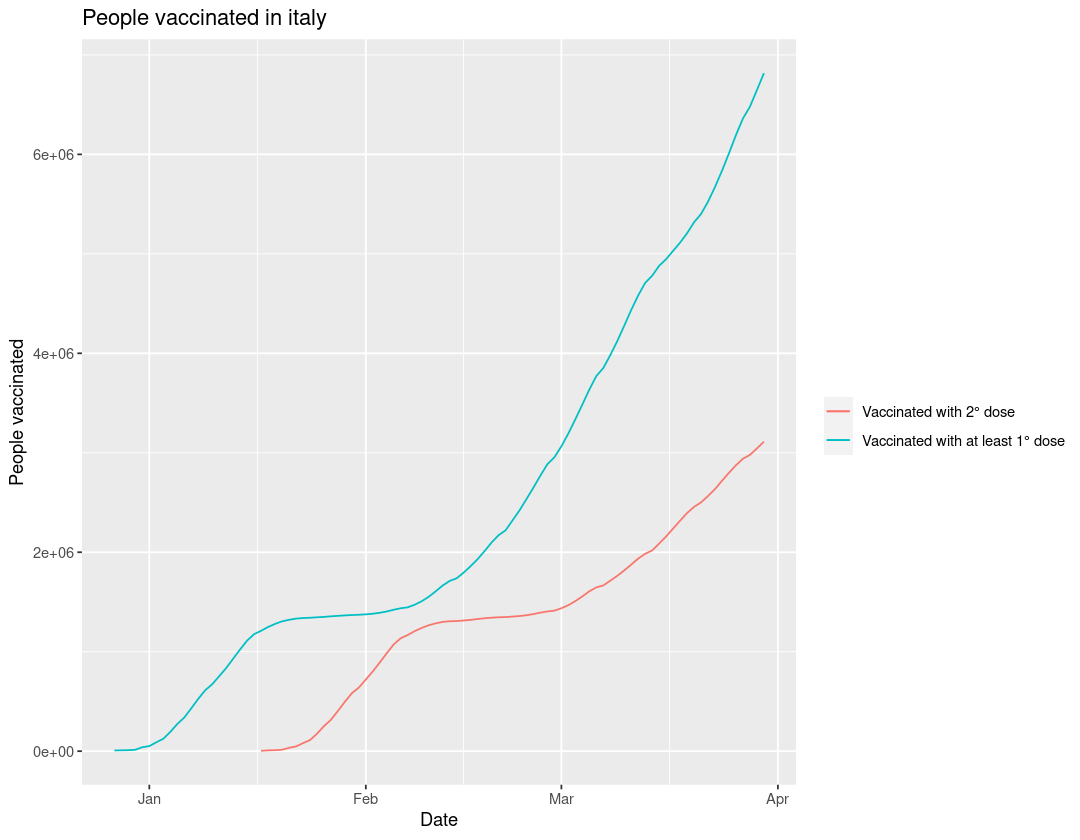

In [52]:
options(repr.plot.width=9, repr.plot.height=7)

ggplot() + 
    geom_line(data = filter(covid_data2, location == "Italy"), aes(x = date, y = people_vaccinated, color = "Vaccinated with at least 1° dose")) +
    geom_line(data = filter(covid_data2, location == "Italy"), aes(x = date, y = people_fully_vaccinated, color = "Vaccinated with 2° dose")) +
    labs( x="Date", y= "People vaccinated", color = "", title = "People vaccinated in italy")

Warning message:
“Removed 25 row(s) containing missing values (geom_path).”


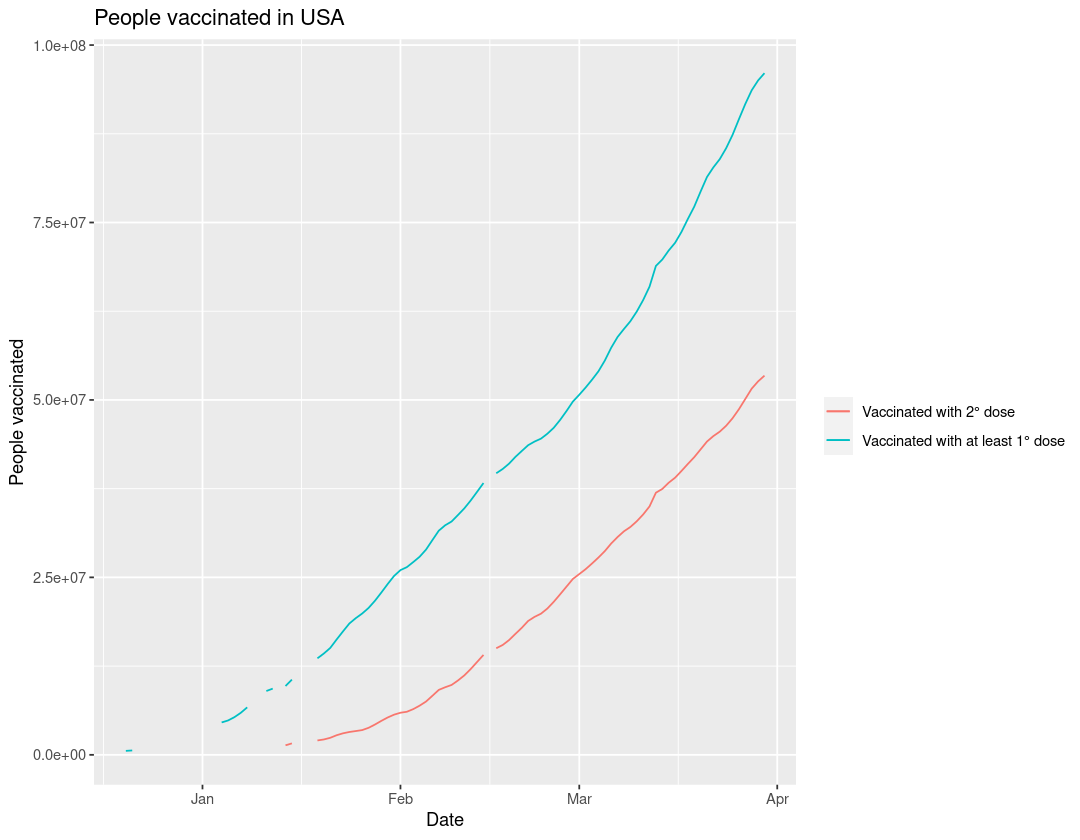

In [53]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot() + 
    geom_line(data = filter(covid_data2, location == "United States"), aes(x = date, y = people_vaccinated, color = "Vaccinated with at least 1° dose")) +
    geom_line(data = filter(covid_data2, location == "United States"), aes(x = date, y = people_fully_vaccinated, color = "Vaccinated with 2° dose")) +
    labs( x="Date", y= "People vaccinated", color = "", title = "People vaccinated in USA")

The difference between the two quantities is much larger in Italy, in comparison with the USA one. This is probably due to a policy that in Italy prefers to vaccinate how much people as possible rather than having a lot of people fully vaccinated.